# Exercice 3

Programmer l'algorithme de Karger Stein

In [23]:
#Structure de données pour représenter un multigraphe par sa matrice d'adjacence
import numpy as np
import copy
import time
import matplotlib.pyplot as plt

class matriceadj :
  #Nous allons initialiser la matrice 
  def __init__(self,taille):
    self.taille = taille
    self.adjMatrice = np.zeros((taille,taille))
    self.ens_sommets = [] # car à cause de la contraction un sommet en représentera plusieurs 
    for i in range (taille):
        self.ens_sommets.append([i])
  #On ajoute les arêtes
  def ajout_arete(self,u,v):
    self.adjMatrice[u,v] +=1
    self.adjMatrice[v,u] += 1


#Fonction qui réalise la contraction 
#Contraction : Programmer simplement la suppression de l'arête donnée en entrée
#Entrées de la fonction : G  multigraphe représenté par sa matrice d'adjacence et e une arête
def contraction(Matrix,u,v,Sommet):
    M = copy.deepcopy(Matrix)
    S = copy.deepcopy(Sommet)
    M[v] = M[u]+M[v]
    M[:,v]=M[:,u]+M[:,v]
    M[v,v]=0 #Si c'est une boucle, on s'en fou un petit peu car cela n'aura aucun impact pour notre algo on applique donc le remove self loops 
    M = np.delete(M,u,0)
    M = np.delete(M,u,1)
    new_sommets = S[v]
    for s in (new_sommets):
        S[u].append(s)
    S.pop(v)
    return M,S

import random as rd
def tirage_arête(Matrix):
    u = rd.randint(0,len(Matrix)-1)
    v = rd.randint(0,len(Matrix)-1)
    while(u==v or Matrix[u,v]==0):
        u = rd.randint(0,len(Matrix)-1)
        v = rd.randint(0,len(Matrix)-1)
    return u,v

def karger(Matrix,sommet): 
    m=copy.deepcopy(Matrix)
    u,v = tirage_arête(m)
    #print("\nL'arête tirée est entre les sommets:",u,v)
    m,s = contraction(m,u,v,sommet)
    #print("Les sommets du graphe apres la contraction :",s)
    #print("La matrice d'adjacence apres la contraction :\n",m)
    while(len(m)>2):
        u,v = tirage_arête(m)
     #   print("\nL'arête tirée est entre les sommets :",u,v)
        m,s = contraction(m,u,v,s)
       # print("La matrice d'adjacence apres la contraction :\n",m)
      #  print("Les sommets du graphe apres la contraction :",s)
    return m,s 

def karger_itere(Matrix,sommet,t):
    m_min = 1000
    for i in range(t):
        s_opt = sommet
        mat_opt = Matrix
        print("\n - Execution n°",i+1,"de l'algorithme de Karger")
        mat,s=karger(Matrix,sommet)
        m=mat[0][1] #Car quoiqu'il arrive la taille de la matrice d'adjacence sera 2x2 et diagonale
        if (m<m_min):
            s_opt=s
            m_min=m
        mat_opt=mat
        print("Le cardinal de la coupe est m=",m)
        print("-----------------------------------------------------------------")
    print("Le cardinal de la coupe minimum est : ",m_min)
    return mat_opt,s_opt


In [26]:
from math import *
def contraction_partielle(Matrix,sommets,t):
    mat=copy.deepcopy(Matrix)
    som=copy.deepcopy(sommets)
    global s
    while(len(mat)>t):
        u,v = tirage_arête(mat)
        mat,s = contraction(mat,u,v,som)
    return mat,s

def karger_stein(Matrix,sommets,t):
    if(len(sommets)<=6):
        mat,vertices=karger_itere(Matrix,sommets,t)
        return mat,vertices
    else:
        t=ceil(1+len(sommets)/sqrt(2))
        matG1,sG1=contraction_partielle(Matrix,sommets,t)
        matS1,sS1=karger_stein(matG1,sG1,t)
        m1=matS1[0][1]
        matG2,sG2=contraction_partielle(Matrix,sommets,t)
        matS2,sS2=karger_stein(matG2,sG2,t)
        m2=matS2[0][1]
        if(m1<m2):
            return matS1,sS1
        else:
            return matS2,sS2


In [7]:
#test’
#g = Graph(4)
#g.ajout_arete(0, 1)
#g.ajout_arete(0, 2)
#g.ajout_arete(0, 3)
#g.ajout_arete(1, 3)
#g.ajout_arete(2, 3)
#vertices = g.ens_sommets
#m = g.adjMatrice
#print(karger_stein(m,vertices,5))

In [27]:
#Essai de Karger Stein sur un graphe biparti complet de taille 10
m1 = mat_bicomplet(10).adjMatrice
s1 = mat_bicomplet(10).ens_sommets


karger_stein(m1,s1,10)


 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 13.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  5.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.

(array([[0., 5.],
        [5., 0.]]),
 [[0, 3], [1], [4, 9], [5], [6], [7, 2, 8]])

### Étude expérimentale de Karger-Stein

On définit les familles de graphes utilisées précédemment

In [15]:
#Cycle a n sommets 
def mat_cycle(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    matrix = matriceadj(taille)#Pour initialiser ma matrice 
    matrix.ajout_arete(0,taille-1)
    for i in range(taille-1):
        matrix.ajout_arete(i,i+1)
    return matrix

#Graphe complet a n sommets 
def mat_complet(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    matrix = matriceadj(taille)#Pour initialiser ma matrice 
    #Comme tous les sommets du graphe sont reliés entre eux, toutes les cases de la matrice d'adjacence sont à 1, sauf la diagonale (pas de boucle)
    for i in range(taille):
        for j in range(taille):
            if j!= i and i <j:#pour ajouter qu'une seule arête entre chaque sommets et éviter les boucles
                matrix.ajout_arete(i,j)
    return matrix

#Graphe biparti complet n = 2k
def mat_bicomplet(taille):
    if (taille % 2 == 0):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice ) qui doit être pair
        matrix = matriceadj(taille)#Pour initialiser ma matrice
        for i in range(taille //2):
            for j in range(taille//2,taille):
                matrix.ajout_arete(i,j)
        return matrix
#Graphes aléatoires à n sommets où une arête est ajoutée à E avec une proba p
def mat_alea(size, p):
    mat = matriceadj(size)
    for i in range(size):
        for j in range(size):
            if(i<j):#pour ajouter qu'une seule arête entre chaque sommets
                _p = np.random.uniform(0,1)#tirage aléatoire de la proba
                if(_p < p):
                    mat.ajout_arete(i,j)
    return mat




Analysons la complexité expérimentale de Karger-Stein


 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 7 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
--------------------------------------------

Le cardinal de la coupe minimum est :  2.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 7 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-

Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 8 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 9 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 10 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 11 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 12 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 13 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 14

Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 46 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 47 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 48 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 49 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 50 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  2.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 8.0
-----------------------------------------

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 4.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 6.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 8.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 8.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 8.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 6.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  4.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 4.0
--

Le cardinal de la coupe minimum est :  7.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 7.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 7.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 7.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 16.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  7.0

 - Execution n° 1 de l'algorithme 


 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 9.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 16.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 24.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 21.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 21.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 24.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  9.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 

Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  2.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
----------------------------------------------

Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  5.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 13.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 13.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
----------------------------------------

Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 13.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  11.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 12.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
---------------------------------------

Le cardinal de la coupe est m= 21.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 21.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 16.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 9.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  9.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 24.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 16.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 16.0
----------------------------------------


 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  2.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 2.0
-

Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------

 - Execution n° 4 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
-----------------------------------------------------------------

 - Execution n° 5 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------

 - Execution n° 6 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------
Le cardinal de la coupe minimum est :  5.0

 - Execution n° 1 de l'algorithme de Karger
Le cardinal de la coupe est m= 11.0
-----------------------------------------------------------------

 - Execution n° 2 de l'algorithme de Karger
Le cardinal de la coupe est m= 8.0
-----------------------------------------------------------------

 - Execution n° 3 de l'algorithme de Karger
Le cardinal de la coupe est m= 5.0
------------------------------------------

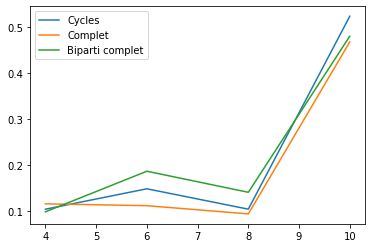

In [52]:
#On réalise notre étude expérimentale de la complexité sur différentes tailles n croissantes
tailles = [4,6,8,10]
T = [10,20,30,40,50]

temps1 = []
temps2 = []
temps3 = []

for i in tailles :
    t1 = 0
    t2 = 0
    t3 = 0
   
    for j in T : #On réitère plusieurs fois afin d'obtenir un temps moyen 
        
        m1 = mat_cycle(i).adjMatrice
        s1 = mat_cycle(i).ens_sommets
        m2 = mat_complet(i).adjMatrice
        s2 = mat_complet(i).ens_sommets
        m3 = mat_bicomplet(i).adjMatrice
        s3 = mat_bicomplet(i).ens_sommets
    
        debut = time.time()
        karger_stein(m1,s1,j)
        end = time.time()
        t1 += end - debut
        
        debut = time.time()
        karger_stein(m2,s2,j)
        end = time.time()
        t2 += end - debut
        
        start = time.time()
        karger_stein(m3,s3,j)
        end = time.time()
        t3 += end - start
        
        
    
    temps1.append(np.mean(t1))
    temps2.append(np.mean(t2))
    temps3.append(np.mean(t3))

complexite = [i**2 * (np.log(i))**3 for i in tailles]
    
plt.plot(tailles,temps1, label='Cycles')
plt.plot(tailles,temps2, label='Complet')
plt.plot(tailles,temps3, label='Biparti complet')




plt.legend()
plt.savefig('Question 3.E.png', dpi=300, bbox_inches='tight')
plt.show()

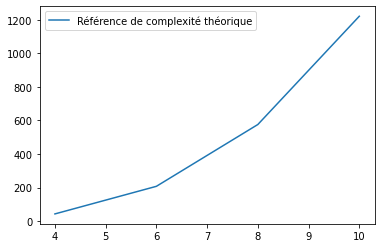

In [49]:
plt.plot(tailles,complexite, label='Référence de complexité théorique')

plt.legend()
plt.savefig('ref 3.E.png', dpi=300, bbox_inches='tight')
plt.show()